<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

**Заказчик.** Консалтинговая компания «Цифра» в интересах золотодобывающего предприятия

**Цель Заказчика.** Оптимизировать производство и исключить возможность запуска предприятия с убыточными характеристиками.

**Цель исследования.** Построить модель для предсказания коэффициента восстановления золота из золотосодержащей руды.

**Задачи:**

- Загрузить и подготовить данные.
- Проанализировать данные
- Построить модель

**Этапы:**

- Проверить корректность расчета эффективности обогащения.
- Проанализировать признаки, недоступные в тестовой выборке.
- Провести предобработку данных.
- Изучить степень изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
- Сравнить распределение размеров гранул сырья на обучающей и тестовой выборках.
- Исследовать суммарную концентрацию всех веществ на разных стадиях.
- Написать функцию для вычисления итоговой sMAPE.
- Обучить разные модели и оценить их качество кросс-валидацией.


**Входные данные от Заказчика.** Три файла в формате .csv с сырыми данными различных параметров работы обагатительного производства.

**Ожидаемый результат.** Подготовлен прототип модели машинного обучения для прогнозирования коэффициента восстановления золота из золотосодержащей руды.

## Подготовка данных

1. Вычислить эффективности обогащения на обучающей выборке для признака `rougher.output.recovery`.
2. Найти MAE между полученными расчётами и значением признака.
3. Проанализировать признаки, недоступные в тестовой выборке. Определить тип параметров
4. Провести предобработку данных.

**Описание данных**

- `date` – дата и время замера

**Исходные данные для первой метрики**
- `rougher.input.feed_au` – сырье золота для флотации
- `rougher.output.concentrate_au` – концентрат золота, полученный в результате флотации
- `rougher.output.tail_au` – хвост золота, полученный в результате флотации

**Исходные данные для второй метрики**
- `final.output.concentrate_au` – финальный полученный концентрат золота
- `final.output.tail_au` – финальный полученный хвост золота
- `primary_cleaner.output.concentrate_au` – концентрат  золота, полученный в результате первичной очистки

**Целевые показатели**
- `final.output.recovery` - эффективность обогащения финального концентрата (первая метрика)
- `rougher.output.recovery` - эффективность обогащения чернового концентрата (вторая мтрика)

**Прочие показатели**

- `rougher.input.feed…` - блок показателей  сырье для флотации (серебро, свинец, соль, размер гранул)
- `rougher.output.concentrate…` - блок показателей концентрат, полученный в результате флотации (серебро, свинец, соль)
- `rougher.output.tail…` - блок показателей хвост, полученный в результате флотации (серебро, свинец, соль)
- `final.output.concentrate…` - блок показателей финального полученного концентрата (серебро, свинец, соль)
- `final.output.tail…` - блок показателей финального полученного хвоста (серебро, свинец, соль)
- `primary_cleaner.output.concentrate…` - блок показателей концентрат, полученный в результате первичной очистки (серебро, свинец, соль)
- `primary_cleaner.input…` - блок показателей сырье для первичной очистки (сульфат, депрессант, ксантогенат, размер гранул)
- `primary_cleaner.output.tail…` - блок показателей хвост, полученный в результате первичной очистки (серебро, свинец, соль, золото)
- `primary_cleaner.state.floatbank…` - блок показателей  параметры флотационной установки для первичной очистки (воздух, жидкость, номер установки)
- `rougher.calculation.sulfate_to_au_concentrate` – характеристики сульфата при флотации для получения концентрата золота
- `rougher.calculation.floatbank…` - блок показателей  параметры сульфата флотационной установки для флотации (номер установки)
- `rougher.input.floatbank…` - блок показателей реагенты при флотации для флотационной установки (сульфат, ксантогенат, номер установки)
- `rougher.state.floatbank…` - блок показателей  параметры флотационной установки для флотации (воздух, жидкость, номер установки)
- `secondary_cleaner.output.tail…` - блок показателей хвост, полученный в результате вторичной очистки (серебро, свинец, соль, золото)
- `secondary_cleaner.state.floatbank…` - блок показателей  параметры флотационной установки для вторичной очистки (воздух, жидкость, номер установки)

In [2]:
# Импотрт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from numpy.random import RandomState

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score # кросс-вылидация
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # стандартизация
from sklearn.utils import shuffle # перемешивание
from sklearn.dummy import DummyClassifier # Наивная модель
from sklearn.dummy import DummyRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import confusion_matrix # матрица "правда / ложь"
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve # график
from sklearn.metrics import roc_auc_score # площадь фигуры по графику

In [3]:
# Введем константу
state = RandomState(12345)

In [4]:
# Функция исследования датасета
def info_df(df_name):
    display(df_name.head())
    st = df_name.shape[0]
    col = df_name.shape[1]
    zerro = df_name.isna().sum()
    print(f'Размер таблиы: {col} столбцов и {st} строк')
    print(f'Больше всего - {max(zerro)} пропусков в столбце {max(zerro.index)}')
    print(f'Общее количество пропусков - {zerro.sum()}')
    print(f'Количество явных дубликатов: {df_name.duplicated().sum()}')
    print()
    print(df_name.info())

In [5]:
# Прочитаем файлы
df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')

In [6]:
info_df(df)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Размер таблиы: 87 столбцов и 19439 строк
Больше всего - 1748 пропусков в столбце secondary_cleaner.state.floatbank6_a_level
Общее количество пропусков - 4481
Количество явных дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                            

In [7]:
info_df(df_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Размер таблиы: 87 столбцов и 14149 строк
Больше всего - 1605 пропусков в столбце secondary_cleaner.state.floatbank6_a_level
Общее количество пропусков - 4100
Количество явных дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                            

In [8]:
info_df(df_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


Размер таблиы: 53 столбцов и 5290 строк
Больше всего - 25 пропусков в столбце secondary_cleaner.state.floatbank6_a_level
Общее количество пропусков - 90
Количество явных дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      52

In [9]:
# Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery
# Найдем MAE между полученными расчётами и значением признака

df_train['rougher.output.recovery_test'] = (
    (df_train['rougher.output.concentrate_au'] * (df_train['rougher.input.feed_au'] - df_train['rougher.output.tail_au'])) / 
    (df_train['rougher.input.feed_au'] * (df_train['rougher.output.concentrate_au'] - df_train['rougher.output.tail_au']))
) * 100

rougher_true = df_train['rougher.output.recovery']
rougher_pred = df_train['rougher.output.recovery_test']
mae_rougher = mean_absolute_error(rougher_true, rougher_pred)

print(f'Средняя фактическая эффективность обогащения {rougher_true.mean():.2f}, средняя расчетная - {rougher_pred.mean():.2f}')
print(f'Среднее абсолютное отклонение расчета эффективности обогащения {mae_rougher:.2f}')

df_train.drop('rougher.output.recovery_test', axis=1, inplace=True)

Средняя фактическая эффективность обогащения 82.70, средняя расчетная - 82.70
Среднее абсолютное отклонение расчета эффективности обогащения 0.00


**Выводы**

1. Анализ имеющихся данных показал, что тестовая выборка имеет значительно меньшее количество столбцов. При этом, отсутствуют не только оба целевых показателя, но и значимое количество параметров для работы модели. 
2. Дата-сеты содержат пропуски – до 22% общего количества данных.
3. Нет точного понимания, какие параметры оказывают влияние на целевые показатели.
4. Анализ корректности расчета одного из двух целевых показателей (`rougher.output.recovery`) подтвердил правильность расчета. Среднее абсолютное отклонение составляет ноль.

В рамках подготовки данных для дальнейшей работы необходимо:
- добавить из общего дата-сета в тестовую выборку целевые показаьели. В качестве индекса будет использован столбец `date`
- Удалить из обучающей выборке столбцы, которых нет в тестовой
- Удалить пропуски методом `ffill`
- на обучающей выборке выявим корреляцию между параметрами. На основании уровня корреляции отберем прогнозные признаки.
- разделим обучающую и тестовую выборки на прогнозные и целевые таблицы

In [10]:
# Добавим в тестовую выборку целевые показатели
df_pre_target = df.loc[:, ['date', 'final.output.recovery', 'rougher.output.recovery']]
df_test_new = df_test.merge(df_pre_target, on='date', how='left')

# Составим список столбцов тестовой выборки
columns_test = list(df_test_new.columns)

# Удалим из обучающей выборки столбцы, которых нет в тестовой
df_train = df_train.loc[:, columns_test]

In [11]:
info_df(df_test_new)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367


Размер таблиы: 55 столбцов и 5290 строк
Больше всего - 25 пропусков в столбце secondary_cleaner.state.floatbank6_a_level
Общее количество пропусков - 90
Количество явных дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      52

In [12]:
info_df(df_train)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,70.541216,87.107763
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,69.266198,86.843261
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,68.116445,86.842308
3,2016-01-15 03:00:00,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,68.347543,87.226430
4,2016-01-15 04:00:00,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,66.927016,86.688794


Размер таблиы: 55 столбцов и 14149 строк
Больше всего - 436 пропусков в столбце secondary_cleaner.state.floatbank6_a_level
Общее количество пропусков - 1705
Количество явных дубликатов: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        14149 non-null  object 
 1   primary_cleaner.input.sulfate               14129 non-null  float64
 2   primary_cleaner.input.depressant            14117 non-null  float64
 3   primary_cleaner.input.feed_size             14149 non-null  float64
 4   primary_cleaner.input.xanthate              14049 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      14145 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    14148 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air  

In [13]:
# Заменим пропуски методом ffill
df = df.fillna(method="ffill")
print(f'Количество пропусков в полном датасете {df.isna().sum().sum()}')

df_train = df_train.fillna(method="ffill")
print(f'Количество пропусков в обучающей выборке {df_train.isna().sum().sum()}')

df_test = df_test.fillna(method="ffill")
print(f'Количество пропусков в тестовой выборка {df_test.isna().sum().sum()}')

df_test_new = df_test_new.fillna(method="ffill")
print(f'Количество пропусков в полной тестовой выборка {df_test_new.isna().sum().sum()}')

Количество пропусков в полном датасете 0
Количество пропусков в обучающей выборке 0
Количество пропусков в тестовой выборка 0
Количество пропусков в полной тестовой выборка 0


In [14]:
# Определисм параметры для разделения выборок
df_train_corr = df_train.corr().loc[:, ['final.output.recovery', 'rougher.output.recovery']]
df_train_corr_short = df_train_corr.loc[
    ((df_train_corr['final.output.recovery'] > 0.15)|
    (df_train_corr['final.output.recovery'] < -0.15)|
    (df_train_corr['rougher.output.recovery'] > 0.15)|
    (df_train_corr['rougher.output.recovery'] < -0.15))&
    ((df_train_corr['final.output.recovery'] != 1)&
    (df_train_corr['rougher.output.recovery'] != 1))
]
print('Количество параметров: ', df_train_corr_short.shape[0])
df_train_corr_short_params = list(df_train_corr_short.index)
df_train_corr_short

Количество параметров:  19


,final.output.recovery,rougher.output.recovery
primary_cleaner.input.sulfate,0.384798,0.272823
primary_cleaner.input.depressant,0.155639,0.041395
primary_cleaner.input.xanthate,0.214886,0.106701
rougher.input.feed_ag,0.310574,0.176421
rougher.input.feed_pb,0.205706,0.173314
rougher.input.feed_rate,0.169602,0.086685
rougher.input.feed_sol,0.261590,0.184105
rougher.input.feed_au,0.308561,0.156173
rougher.input.floatbank10_xanthate,0.328838,0.238468
rougher.input.floatbank11_xanthate,0.305498,0.216100


Разделение и стандартизация выборок будет проведено после анализа данных

## Анализ данных

1. Изучить степень изменения концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
2. Сравнить распределения размеров гранул сырья на обучающей и тестовой выборках.
3. Исследовать суммарную концентрацию всех веществ на разных стадиях: 
    - в сырье, 
    - в черновом концентрате
    - в финальном концентрате

In [15]:
# Сравним степень изменения концентрация металлов на различных этапах очистки
au_conc = []
ag_conc = []
pb_conc = []
au_tail = []
ag_tail = []
pb_tail = []

au_conc.append(df['rougher.output.concentrate_au'].mean())
au_conc.append(df['primary_cleaner.output.concentrate_au'].mean())
au_conc.append(df['final.output.concentrate_au'].mean())

ag_conc.append(df['rougher.output.concentrate_ag'].mean())
ag_conc.append(df['primary_cleaner.output.concentrate_ag'].mean())
ag_conc.append(df['final.output.concentrate_ag'].mean())

pb_conc.append(df['rougher.output.concentrate_pb'].mean())
pb_conc.append(df['primary_cleaner.output.concentrate_pb'].mean())
pb_conc.append(df['final.output.concentrate_pb'].mean())

au_tail.append(df['rougher.output.tail_au'].mean())
au_tail.append(df['primary_cleaner.output.tail_au'].mean())
au_tail.append(df['secondary_cleaner.output.tail_au'].mean())

ag_tail.append(df['rougher.output.tail_ag'].mean())
ag_tail.append(df['primary_cleaner.output.tail_ag'].mean())
ag_tail.append(df['secondary_cleaner.output.tail_ag'].mean())

pb_tail.append(df['rougher.output.tail_pb'].mean())
pb_tail.append(df['primary_cleaner.output.tail_pb'].mean())
pb_tail.append(df['secondary_cleaner.output.tail_pb'].mean())

df_phases = pd.DataFrame(
    {'phase': ['rougher', 'primary_cleaner', 'secondary_cleaner'], 
     'au_conc': au_conc, 
     'ag_conc': ag_conc, 
     'pb_conc': pb_conc,
     '':'',
     'au_tail': au_tail, 
     'ag_tail': ag_tail, 
     'pb_tail': pb_tail,
    }
)
df_phases

,phase,au_conc,ag_conc,pb_conc,,au_tail,ag_tail,pb_tail
0,rougher,19.772000,11.994759,7.606272,,1.816391,5.589064,0.645782
1,primary_cleaner,32.119400,8.442408,9.810317,,3.914179,16.145888,3.433558
2,secondary_cleaner,44.076513,5.168387,9.978821,,4.339625,14.586720,5.776428


Среднее значение размера гранул сырья на обучающей выборке - 60.24
Среднее значение размера гранул сырья на тестовой выборке - 55.95


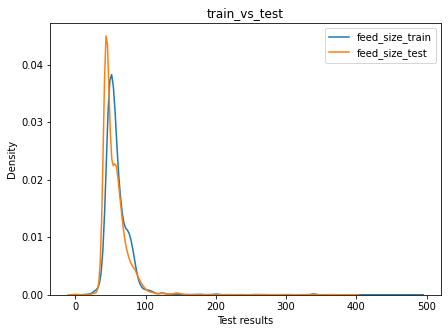

In [16]:
# Сравним распределения размеров гранул первичного сырья на обучающей и тестовой выборках
feed_size_train = df_train['rougher.input.feed_size']
feed_size_test = df_test_new['rougher.input.feed_size']
print(f'Среднее значение размера гранул сырья на обучающей выборке - {feed_size_train.mean():.2f}')
print(f'Среднее значение размера гранул сырья на тестовой выборке - {feed_size_test.mean():.2f}')

plt.figure(figsize=(7, 5))
sns.kdeplot(data=feed_size_train, label='feed_size_train')
sns.kdeplot(data=feed_size_test, label='feed_size_test')
plt.xlabel("Test results")
plt.title('train_vs_test')
plt.legend()
plt.show()

Среднее значение размера гранул ОЧИЩЕННОГО сырья на обучающей выборке - 7.32
Среднее значение размера гранул ОЧИЩЕННОГО сырья на тестовой выборке - 7.27


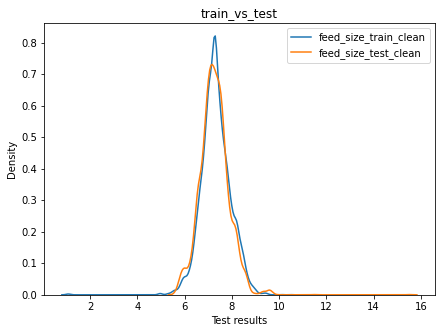

In [17]:
# Сравним распределения размеров гранул очищенного сырья на обучающей и тестовой выборках
feed_size_train_clean = df_train['primary_cleaner.input.feed_size']
feed_size_test_clean = df_test_new['primary_cleaner.input.feed_size']
print(f'Среднее значение размера гранул ОЧИЩЕННОГО сырья на обучающей выборке - {feed_size_train_clean.mean():.2f}')
print(f'Среднее значение размера гранул ОЧИЩЕННОГО сырья на тестовой выборке - {feed_size_test_clean.mean():.2f}')

plt.figure(figsize=(7, 5))
sns.kdeplot(data=feed_size_train_clean, label='feed_size_train_clean')
sns.kdeplot(data=feed_size_test_clean, label='feed_size_test_clean')
plt.xlabel("Test results")
plt.title('train_vs_test')
plt.legend()
plt.show()

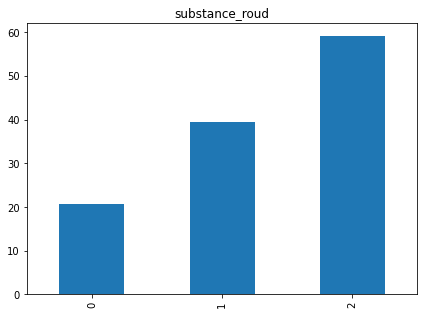

In [18]:
# Исследуем суммарную концентрацию всех веществ на разных стадиях производства
substance_feed = df['rougher.input.feed_au'].mean() + df['rougher.input.feed_ag'].mean() + df['rougher.input.feed_pb'].mean()
substance_rough = df['rougher.output.concentrate_au'].mean() + df['rougher.output.concentrate_ag'].mean() + df['rougher.output.concentrate_pb'].mean()
substance_final = df['final.output.concentrate_au'].mean() + df['final.output.concentrate_ag'].mean() + df['final.output.concentrate_pb'].mean()

roud = []
roud.append(substance_feed)
roud.append(substance_rough)
roud.append(substance_final)
roud = pd.Series(roud)

plt.figure(figsize=(7, 5))
roud.plot(kind='bar')
plt.title('substance_roud')
plt.show()

In [19]:
# Выявим замеры, где концентрация вещества равна 0
df['substance_feed'] = df['rougher.input.feed_au'] + df['rougher.input.feed_ag'] + df['rougher.input.feed_pb']
df['substance_rough'] = df['rougher.output.concentrate_au'] + df['rougher.output.concentrate_ag'] + df['rougher.output.concentrate_pb']
df['substance_final'] = df['final.output.concentrate_au'] + df['final.output.concentrate_ag'] + df['final.output.concentrate_pb']
substance_zerro = list(df.loc[(df['substance_feed'] == 0)|(df['substance_rough'] == 0)|(df['substance_final'] == 0), 'date'])
print(f'Всего в общей выборке {len(substance_zerro)} строк с нулевой концентрацией вещества')

# Удалим строки с некорректными замерамии из обучающей и тестовой выборок
df_train = df_train.query('date not in @substance_zerro')
df_test_new = df_test_new.query('date not in @substance_zerro')

print(f'После удалениея некорректных замеров в обучающей выборке {df_train.shape[0]} строк')
print(f'После удалениея некорректных замеров в тестовой выборке {df_test_new.shape[0]} строк')


Всего в общей выборке 490 строк с нулевой концентрацией вещества
После удалениея некорректных замеров в обучающей выборке 13795 строк
После удалениея некорректных замеров в тестовой выборке 5154 строк


In [20]:
# Разделим выборки
features_train_rough = df_train.loc[:, df_train_corr_short_params]
features_test_rough = df_test_new.loc[:, df_train_corr_short_params]
target_train_rough = df_train['rougher.output.recovery']
target_test_rough = df_test_new['rougher.output.recovery']

features_train_fin = df_train.loc[:, df_train_corr_short_params]
features_test_fin = df_test_new.loc[:, df_train_corr_short_params]
target_train_fin = df_train['final.output.recovery']
target_test_fin = df_test_new['final.output.recovery']

In [21]:
# Стандартизируем данные
pd.options.mode.chained_assignment = None

def scaler(features_train, features_test):
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_test = scaler.transform(features_test)
    return features_train, features_test

features_train_rough, features_test_rough = scaler(features_train_rough, features_test_rough)
features_train_fin, features_test_fin = scaler(features_train_fin, features_test_fin)

**Выводы**

Для анализа изменения степени концентрации исследованы результаты уровни концентраций металлов в результате флотации, первичной очистки и финальной очистки.

Анализ показал, что изменение степени концентрации металлов в зависимости от производственного цикла разнонаправленное. Так, в продукте очистки концентрация золота стабильно растет. Свинец имеет стабильную концентрацию, а серебро, напротив, снижается.

В хвостах наблюдается иная картина. Исчезает разнонаправленность – концентрация всех металлов стабильно растет по ходу производственного процесса. Самое высокое абсолютное значение роста у серебра. Во-первых, этот факт закономерен если учесть снижение концентрации серебра в продукте переработки. Во-вторых, данный факт говорит и настройке производственного процесса, исключающего выделение серебра.

Исследование размера гранул на обучающей и тестовой выборках показало их незначительно отклонение в первичном сырье и практически полную идентичность после первичной очистки. Это говорит о допустимости использования имеющейся разбивки на обучающую и тестовую выборки.

Исследование суммарной концентрации всех веществ на разных стадиях показало ее стабильный рост по ходу производственного процесса с 20% в сырье до 60% в финальном концентрате

## Модель

1. Написать функцию для вычисления итоговой sMAPE.
2. Обучить разные модели и оценить их качество кросс-валидацией.
3. Выбрать лучшую модель и проверить её на тестовой выборке

In [22]:
#  Функция для вычисления итоговой sMAPE
def smape(true_rough, pred_rough, true_fin, pred_fin): 
    rough = 100/len(true_rough) * np.sum(2 * np.abs(pred_rough - true_rough) / (np.abs(true_rough) + np.abs(pred_rough)))
    fin = 100/len(true_fin) * np.sum(2 * np.abs(pred_fin - true_fin) / (np.abs(true_fin) + np.abs(pred_fin)))
    return 0.25 * rough + 0.75 * fin

In [23]:
# Обучим модели методом логистической регрессии с использованем кросс-валидация (5 частей)
smape_regres_list = []
all_line = len(df_train)
sample_size = int(all_line/5)
for i in range(0, all_line, sample_size):
    if i+sample_size >= all_line:
        break
    else:
        valid_indexes = list(range(i, i+sample_size)) 
        train_indexes = list(range(0, i)) + list(range(i+sample_size, all_line))

        # Создадим выборки методом кросс-валидация для показателя rough и обучим модель
        features_train_rough_short = features_train_rough[train_indexes]
        target_train_rough_short = target_train_rough.loc[target_train_rough.index[train_indexes]]
        features_valid_rough_short = features_train_rough[valid_indexes]
        target_valid_rough_short = target_train_rough.loc[target_train_rough.index[valid_indexes]]
    
        model_regres_rough = LinearRegression()
        model_regres_rough.fit(features_train_rough_short, target_train_rough_short)
        predict_test_rough = model_regres_rough.predict(features_valid_rough_short)

        # Создадим выборки методом кросс-валидация для показателя fin и обучим модель
        features_train_fin_short = features_train_fin[train_indexes]
        target_train_fin_short = target_train_fin.loc[target_train_fin.index[train_indexes]]
        features_valid_fin_short = features_train_fin[valid_indexes]
        target_valid_fin_short = target_train_fin.loc[target_train_fin.index[valid_indexes]]

        model_regres_fin = LinearRegression()
        model_regres_fin.fit(features_train_fin_short, target_train_fin_short)
        predict_test_fin = model_regres_fin.predict(features_valid_fin_short)

        # Проверим качество модели
        smape_regres = smape(target_valid_rough_short, predict_test_rough, target_valid_fin_short, predict_test_fin)
        smape_regres_list.append(smape_regres)
    
# Рассчитаем среднее качество модели
fin_smape_regres = sum(smape_regres_list) / len(smape_regres_list)
print(f'На модели логистической регрессии средний уровень sMAPE = {fin_smape_regres:.4f}')


На модели логистической регрессии средний уровень sMAPE = 8.4537


**Дерево решений**

Обучим модели на параметре `max_depth` от 5 до 10 с использованием кросс-валидация (5 частей)

Проверим методом `итоговой sMAPE`. Лучшую модель сохраним для дальнейшего сравнения

In [24]:
best_model_tree = None
best_result_smape_tree = 10000000
best_depth_tree = 0

for depth in range(5, 11):
    smape_tree_list = []
    for i in range(0, all_line, sample_size):
        if i+sample_size >= all_line:
            break
        else:
            valid_indexes = list(range(i, i+sample_size)) 
            train_indexes = list(range(0, i)) + list(range(i+sample_size, all_line))

            # Создадим выборки методом кросс-валидация для показателя rough и обучим модель
            features_train_rough_short = features_train_rough[train_indexes]
            target_train_rough_short = target_train_rough.loc[target_train_rough.index[train_indexes]]
            features_valid_rough_short = features_train_rough[valid_indexes]
            target_valid_rough_short = target_train_rough.loc[target_train_rough.index[valid_indexes]]

            model_tree_rough = DecisionTreeRegressor(max_depth=depth, random_state=state)
            model_tree_rough.fit(features_train_rough_short, target_train_rough_short)
            predict_test_rough = model_tree_rough.predict(features_valid_rough_short)
    
            # Создадим выборки методом кросс-валидация для показателя fin и обучим модель
            features_train_fin_short = features_train_fin[train_indexes]
            target_train_fin_short = target_train_fin.loc[target_train_fin.index[train_indexes]]
            features_valid_fin_short = features_train_fin[valid_indexes]
            target_valid_fin_short = target_train_fin.loc[target_train_fin.index[valid_indexes]]

            model_tree_fin = DecisionTreeRegressor(max_depth=depth, random_state=state)
            model_tree_fin.fit(features_train_fin_short, target_train_fin_short)
            predict_test_fin = model_tree_fin.predict(features_valid_fin_short)
            
            # Проверим качество модели
            smape_tree = smape(target_valid_rough_short, predict_test_rough, target_valid_fin_short, predict_test_fin)
            smape_tree_list.append(smape_tree)

    # Рассчитаем среднее качество модели
    fin_smape_tree = sum(smape_tree_list) / len(smape_tree_list)
    print(f'На модели Дерево с глубиной {depth} средний уровень sMAPE = {fin_smape_tree:.4f}')
    
    if best_result_smape_tree > fin_smape_tree:
        best_result_smape_tree = fin_smape_tree
        best_depth_tree = depth
        best_model_tree_rough = model_tree_rough
        best_model_tree_fin = model_tree_fin


На модели Дерево с глубиной 5 средний уровень sMAPE = 8.7389
На модели Дерево с глубиной 6 средний уровень sMAPE = 8.9799
На модели Дерево с глубиной 7 средний уровень sMAPE = 9.1946
На модели Дерево с глубиной 8 средний уровень sMAPE = 9.8210
На модели Дерево с глубиной 9 средний уровень sMAPE = 10.3764
На модели Дерево с глубиной 10 средний уровень sMAPE = 10.7111


**Случайный лес**

Обучим модели с использованием росс-валидация (3 частей) со следующими гиперпараметрами:

- с лучшей глубиной по модели Дерево решений
- с количеством деревьев: от 10 до 30 с шагом 10.

Проверим методом `итоговой sMAPE`. Лучшую модель сохраним для дальнейшего сравнения

In [25]:
best_model_forest = None
best_result_smape_forest = 10000000
best_est_forest = 0

sample_size = int(all_line/3)
for est in range(10, 31, 10):
    smape_forest_list = []
    for i in range(0, all_line, sample_size):
        if i+sample_size >= all_line:
            break
        else:
            valid_indexes = list(range(i, i+sample_size)) 
            train_indexes = list(range(0, i)) + list(range(i+sample_size, all_line))

            # Создадим выборки методом кросс-валидация для показателя rough и обучим модель
            features_train_rough_short = features_train_rough[train_indexes]
            target_train_rough_short = target_train_rough.loc[target_train_rough.index[train_indexes]]
            features_valid_rough_short = features_train_rough[valid_indexes]
            target_valid_rough_short = target_train_rough.loc[target_train_rough.index[valid_indexes]]

            model_forest_rough = RandomForestRegressor(random_state=state,
                                                     n_estimators=est,
                                                     max_depth=best_depth_tree)
            model_forest_rough.fit(features_train_rough_short, target_train_rough_short)
            predict_test_rough = model_forest_rough.predict(features_valid_rough_short)
    
            # Создадим выборки методом кросс-валидация для показателя fin и обучим модель
            features_train_fin_short = features_train_fin[train_indexes]
            target_train_fin_short = target_train_fin.loc[target_train_fin.index[train_indexes]]
            features_valid_fin_short = features_train_fin[valid_indexes]
            target_valid_fin_short = target_train_fin.loc[target_train_fin.index[valid_indexes]]

            model_forest_fin = RandomForestRegressor(random_state=state,
                                                     n_estimators=est,
                                                     max_depth=best_depth_tree)
            model_forest_fin.fit(features_train_rough_short, target_train_rough_short)
            predict_test_fin = model_forest_fin.predict(features_valid_rough_short)
            
            # Проверим качество модели
            smape_forest = smape(target_valid_rough_short, predict_test_rough, target_valid_fin_short, predict_test_fin)
            smape_forest_list.append(smape_forest)

    # Рассчитаем среднее качество модели
    fin_smape_forest = sum(smape_forest_list) / len(smape_forest_list)
    print(f'На модели Случайный Лес с глубиной {best_depth_tree} и числом деревьев {est} средний уровень sMAPE = {fin_smape_forest:.4f}')
    
    if best_result_smape_forest > fin_smape_forest:
        best_result_smape_forest = fin_smape_forest
        best_est_forest = est
        best_model_forest_rough = model_forest_rough
        best_model_forest_fin = model_forest_fin


На модели Случайный Лес с глубиной 5 и числом деревьев 10 средний уровень sMAPE = 19.4611
На модели Случайный Лес с глубиной 5 и числом деревьев 20 средний уровень sMAPE = 19.5601
На модели Случайный Лес с глубиной 5 и числом деревьев 30 средний уровень sMAPE = 19.4898


In [26]:
# Проверим работу лучшей модели на тестовой выборке

predict_test_rough_best = best_model_tree_rough.predict(features_test_rough)
predict_test_fin_best = best_model_tree_fin.predict(features_test_fin)
smape_best = smape(target_test_rough, predict_test_rough_best, target_test_fin, predict_test_fin_best)

print(f'Лучшая модель Решающее дерево с глубиной {best_depth_tree} на тестовой выборке показала уровень sMAPE = {smape_best:.4f}')

Лучшая модель Решающее дерево с глубиной 5 на тестовой выборке показала уровень sMAPE = 7.2710


In [27]:
# Подберем лучшие параметры Решающего дерева методом GridSearchCV
clf = DecisionTreeRegressor(random_state=state)
parametrs = {'max_depth': range(5, 11)}

model_tree_rough_1 = GridSearchCV(clf, parametrs, cv=5)
model_tree_rough_1.fit(features_train_rough, target_train_rough)
best_depth_tree_rough_1 = model_tree_rough_1.best_params_.get('max_depth')
print(f'Лучший параметр глубины по показателю rougher.output.recovery - {best_depth_tree_rough_1}')

model_tree_fin_1 = GridSearchCV(clf, parametrs, cv=5)
model_tree_fin_1.fit(features_train_fin, target_train_fin)
best_depth_tree_fin_1 = model_tree_fin_1.best_params_.get('max_depth')
print(f'Лучший параметр глубины по показателю finale.output.recovery - {best_depth_tree_fin_1}')

# Обучим и проверим модель с подобранными параметрами
model_tree_rough_ok = DecisionTreeRegressor(max_depth=best_depth_tree_rough_1, random_state=state)
model_tree_rough_ok.fit(features_train_rough, target_train_rough)
predict_test_rough_ok = model_tree_rough_ok.predict(features_test_rough)

model_tree_fin_ok = DecisionTreeRegressor(max_depth=best_depth_tree_fin_1, random_state=state)
model_tree_fin_ok.fit(features_train_fin, target_train_fin)
predict_test_fin_ok = model_tree_fin_ok.predict(features_test_fin)

smape_ok = smape(target_test_rough, predict_test_rough_ok, target_test_fin, predict_test_fin_ok)
print(f'Улучшенная модель Решающее дерево на тестовой выборке показала уровень sMAPE = {smape_ok:.4f}')


Лучший параметр глубины по показателю rougher.output.recovery - 6
Лучший параметр глубины по показателю finale.output.recovery - 5
Улучшенная модель Решающее дерево на тестовой выборке показала уровень sMAPE = 7.6550


In [28]:
# Создадим константную модель
target_test_rough_const = pd.Series(target_train_rough.mean(), index=target_test_rough.index)
target_test_fin_const = pd.Series(target_train_fin.mean(), index=target_test_fin.index)
smape_const = smape(target_test_rough, target_test_rough_const, target_test_fin, target_test_fin_const)
print(f'На константной модели значение sMAPE = {smape_const:.4f}')

#Проверка "наивным" алгоритмом
naive_model_rough = DummyRegressor(strategy="mean")
naive_model_rough.fit(features_train_rough, target_train_rough)
naive_test_rough = naive_model_rough.predict (features_test_rough)

naive_model_fin = DummyRegressor(strategy="mean")
naive_model_fin.fit(features_train_fin, target_train_fin)
naive_test_fin = naive_model_fin.predict (features_test_fin)

smape_naive = smape(target_test_rough, naive_test_rough, target_test_fin, naive_test_fin)
print(f'Результат наивного алгоритма = {smape_naive:.4f}')

На константной модели значение sMAPE = 7.7666
Результат наивного алгоритма = 7.7666


**Выводы**

Для упрощения расчета метрики создана функция, позволяющая считать `итоговый sMAPE`

С использованием метода кросс-валидациии ранее созданная и стандартизированная обучающая выборка использована для обучения модели. Поскольку целевых показателя два - `rougher.output.recovery` и `final.output.recovery`, то сформировано два блока выборок и на каждой итерации обучалось две модели.

Обучено три модели:
- `Логистическая регрессия`. Число уровней `кросс-валидации` – 5. Лучшее значение `итоговый sMAPE` - **8.4537**
- `Дерево решений`. Число уровней `кросс-валидации` – 5. Параметры максимальной глубины от 5 до 10. Лучшее значение `итоговый sMAPE` - **8.7389** (при глубине – 5)
- Случайный лес с лучшим параметром глубины решения по предыдущей модели (5). Число уровней `кросс-валидации` – 3. Параметры `числа деревьев` от 10 до 30 с шагом 10. Лучшее значение `итоговый sMAPE` - **19.4611** (при числе деревьев – 10)

Лучшая модель, **Решающее дерево с максимальной глубиной 5**, проверена на тестовой выборке, где показала значение `итоговый sMAPE` - **7.2710**

Модель `Решающее дерево` с автоматическим перебором параметров по сетке `GridSearchCV` уточнила лучшие параметры: по показателю `rougher.output.recovery` – 6, а по показателю `finale.output.recovery` – 5. Однако по данной модели на тестовой выборке значение `итоговый sMAPE` - **7.6550**

**Резюме**

Для прогнозирования коэффициента восстановления золота из золотосодержащей руды наиболее эффективно использовать модель, Решающее дерево с максимальной глубиной 5.


## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке